# Análise exploratória de dados

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## 1. Coleta dos dados

In [2]:
df = sns.load_dataset('mpg')
df.to_csv('../data/raw/mpg.csv', index=False)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 2. Dicionário de dados

In [3]:
df_dict=pd.DataFrame([
    {
        'variavel':'mpg',
        'descricao':'Milhas por Galão(1 galão = 3.7 L , 1 milha = 1.6 Km)',
        'tipo':'quantitativa',
        'subtipo':'continua'
    },{
        'variavel':'cylinders',
        'descricao':'Cilindros do carro',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    },{
        'variavel':'displacement',
        'descricao':'Capacidade do motor',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    },{
        'variavel':'horsepower',
        'descricao':'Potencia em cavalos',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    },{
        'variavel':'weight',
        'descricao':'peso',
        'tipo':'quantitativa',
        'subtipo':'continua'
    },{
        'variavel':'acceleration',
        'descricao':'tempo para sair de 0 a 100 km/h em segundos',
        'tipo':'quantitativa',
        'subtipo':'continua'
    },{
        'variavel':'model_year',
        'descricao':'ano do modelo do carro',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    },{
        'variavel':'origin',
        'descricao':'Local onde foi produzido',
        'tipo':'qualitativa',
        'subtipo':'nominal'
    },{
        'variavel':'name',
        'descricao':'nome do modelo do carro',
        'tipo':'qualitativa',
        'subtipo':'nominal'
    }
])
     

In [4]:
df_dict.to_csv('../data/external/mpg_dict.csv', index=False)
df_dict

,variavel,descricao,tipo,subtipo
0,mpg,"Milhas por Galão(1 galão = 3.7 L , 1 milha = 1...",quantitativa,continua
1,cylinders,Cilindros do carro,quantitativa,discreta
2,displacement,Capacidade do motor,quantitativa,discreta
3,horsepower,Potencia em cavalos,quantitativa,discreta
4,weight,peso,quantitativa,continua
5,acceleration,tempo para sair de 0 a 100 km/h em segundos,quantitativa,continua
6,model_year,ano do modelo do carro,quantitativa,discreta
7,origin,Local onde foi produzido,qualitativa,nominal
8,name,nome do modelo do carro,qualitativa,nominal


- São 9 variáveis, sendo 3 quantitativas contínuas, 4 quantitativas discretas e 2 qualitativas nominais.

## 3. Perguntas de partida e hipóteses.

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma correlação entre as variáveis numéricas?

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [5]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

In [6]:
print(df.isnull().sum())
number_of_na_rows = df.isnull().any(axis=1).sum()
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]

print(f'''
A partir dessa informação percebemos que existem valores faltantes na(s) variável(is) {number_of_na_by_column.axes[0].tolist()}.
Além disso, sabemos que existem {number_of_na_rows} linhas com valores faltantes''')

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

A partir dessa informação percebemos que existem valores faltantes na(s) variável(is) ['horsepower'].
Além disso, sabemos que existem 6 linhas com valores faltantes


### Qual a distribuição dos dados (variável por variável)?

In [7]:
df[df_dict.query('subtipo=="discreta"').variavel.to_list()] = df[df_dict.query('subtipo=="discreta"').variavel.to_list()].astype(str)

In [8]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398,398,398,398.000000,398.000000,398,398,398
unique,NaN,5,82,94,NaN,NaN,13,3,305
top,NaN,4,97.0,150.0,NaN,NaN,73,usa,ford pinto
freq,NaN,204,21,22,NaN,NaN,40,249,6
mean,23.514573,NaN,NaN,NaN,2970.424623,15.568090,NaN,NaN,NaN
std,7.815984,NaN,NaN,NaN,846.841774,2.757689,NaN,NaN,NaN
min,9.000000,NaN,NaN,NaN,1613.000000,8.000000,NaN,NaN,NaN
25%,17.500000,NaN,NaN,NaN,2223.750000,13.825000,NaN,NaN,NaN
50%,23.000000,NaN,NaN,NaN,2803.500000,15.500000,NaN,NaN,NaN
75%,29.000000,NaN,NaN,NaN,3608.000000,17.175000,NaN,NaN,NaN


- Existem 305 carros diferentes, de 398 no total.
- O carro mais frequente é o ford pinto
- Existem 3 locais de produção diferentes
- O local de produção mais frequente é USA.
- A média de consumo é 23.5mpg, com um mínimo de 9mpg e máximo de 46.6mpg, aproximadamente.
- Os pesos variam de 1613 a 5140, com média de 2970, aproximadamente.

In [9]:
df[df_dict.query('subtipo=="discreta"').variavel.to_list()] = df[df_dict.query('subtipo=="discreta"').variavel.to_list()].apply(pd.to_numeric, errors='coerce').fillna(-1).astype(int)

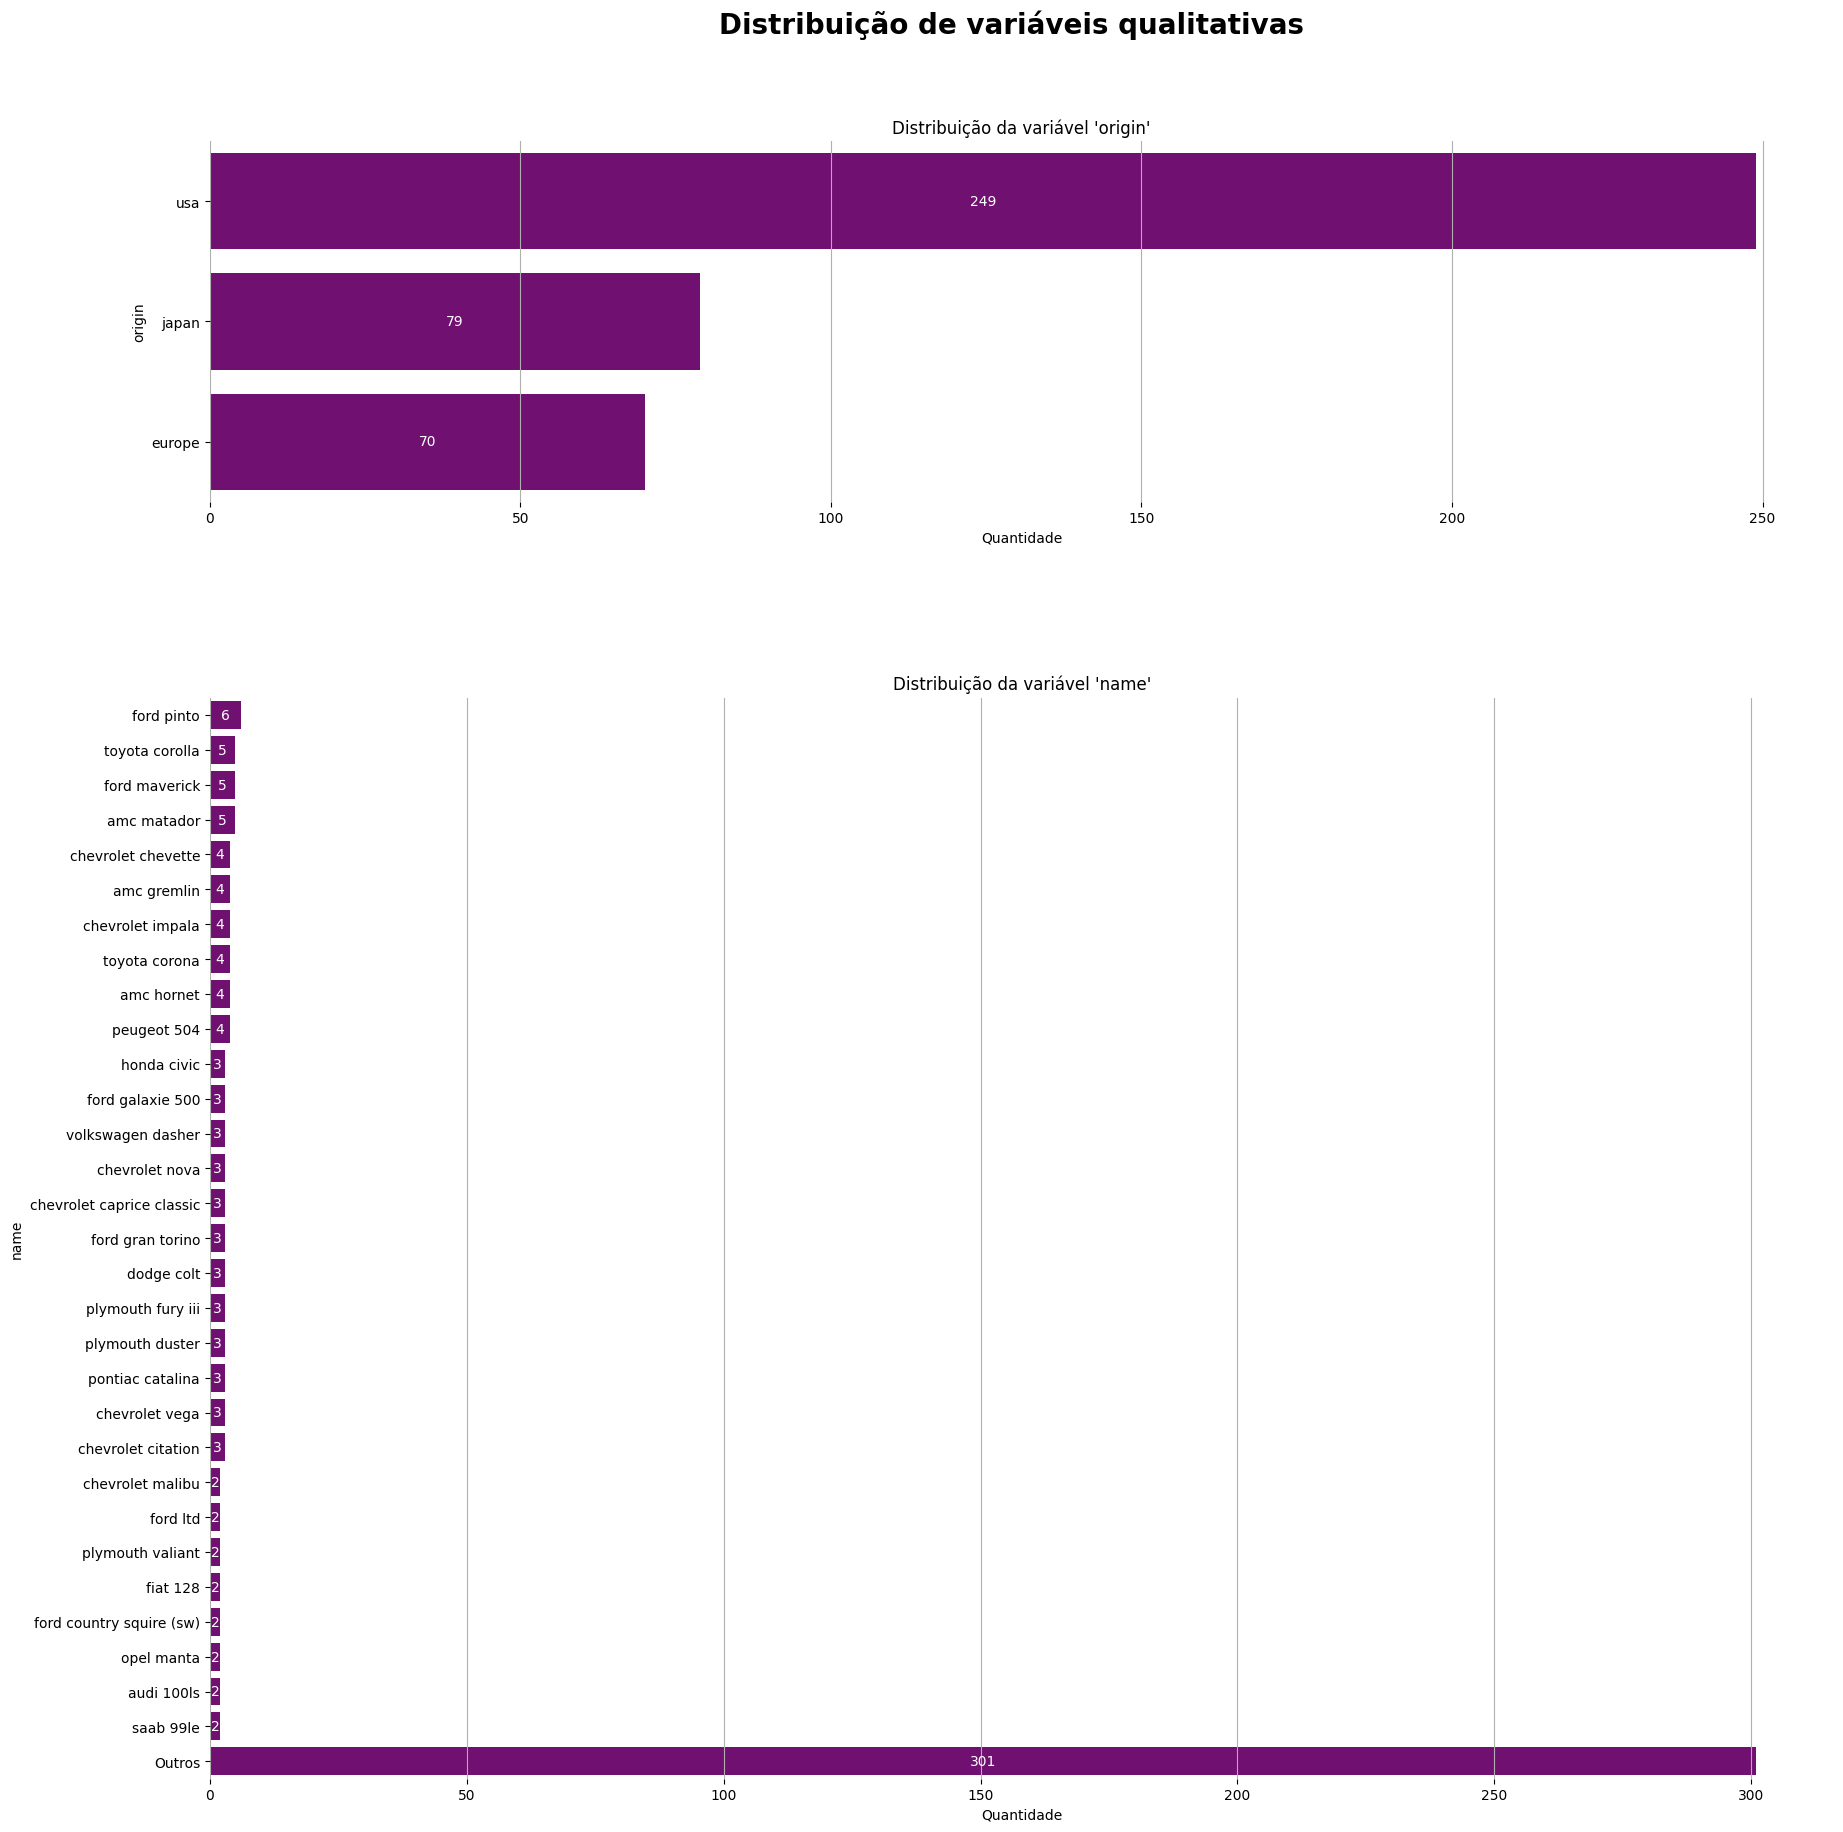

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(20,20), gridspec_kw={'height_ratios':[1, 3]})
plt.tight_layout(pad=12)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold', fontsize=20)
for i, variavel in enumerate(df_dict.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    df_copy=df.copy()
    if variavel == 'name': 
        df_copy[variavel]=df_copy[variavel].replace(order[30:], 'Outros')
        ax = sns.countplot(
            data=df_copy,
            y=variavel,
            color='purple',
            ax=axes.flatten()[i],
            order=(list(order[:30])) + ['Outros']
        )
    else:
        ax = sns.countplot(
        data=df_copy,
        y=variavel,
        color='purple',
        ax=axes.flatten()[i],
        order=(list(order[:30]))
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')
plt.show()

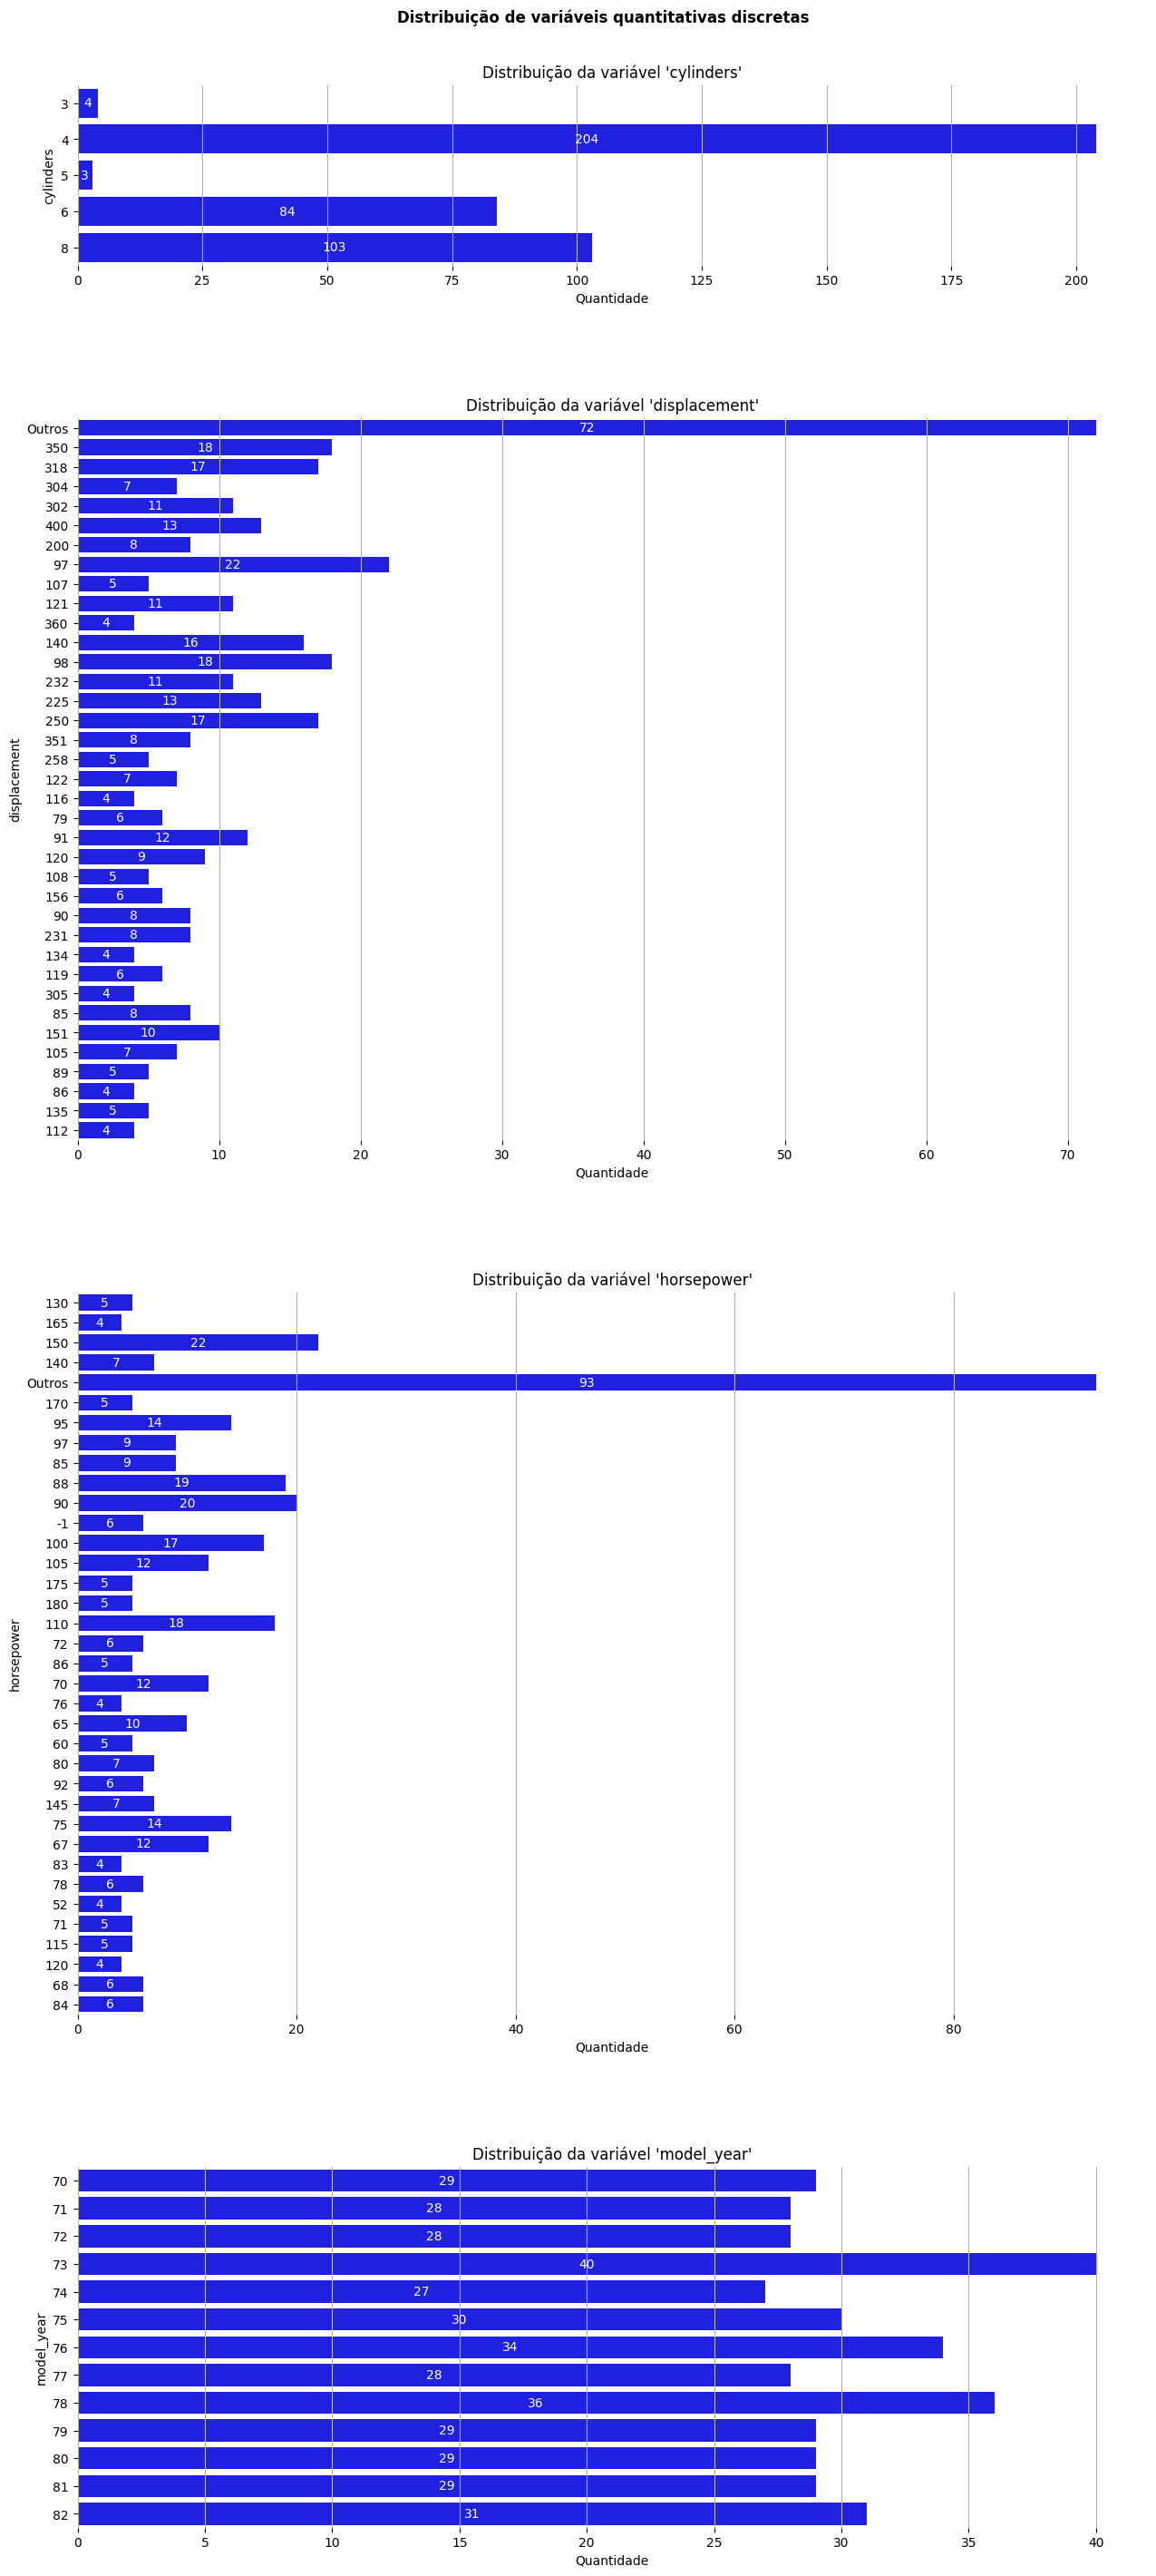

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(15,30),gridspec_kw={'height_ratios':[1, 4, 4, 2]})
plt.tight_layout(pad=10)
fig.suptitle('Distribuição de variáveis quantitativas discretas', fontweight='bold')

for i, variavel in enumerate(df_dict.query("subtipo == 'discreta'").variavel.to_list()):
    if variavel == 'displacement' or variavel == 'horsepower':
        total = df[variavel].count()
        value_counts = df[variavel].value_counts()
        value_counts_filtered = value_counts[(value_counts / total) > 0.01]
        value_counts = df[variavel].value_counts()
        value_counts_filtered = value_counts[(value_counts / total) > 0.01]
        order = value_counts_filtered.index.to_list()
        order.sort()
        order.append('Outros')
        df_copy = df.copy()
        df_copy[variavel] = df_copy[variavel].astype(str)
        df_copy.loc[~df_copy[variavel].isin(value_counts_filtered.index.astype(str)), variavel] = 'Outros'
        
        ax = sns.countplot(
            data=df_copy,
            y=variavel,
            ax=axes.flatten()[i],
            # order = order,
            color='blue'
        )
    else:
        ax = sns.countplot(
            data=df,
            y=variavel,
            ax=axes.flatten()[i],
            color='blue'
        )
    
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    
    ax.set(frame_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.ylabel(variavel)
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')

plt.show()

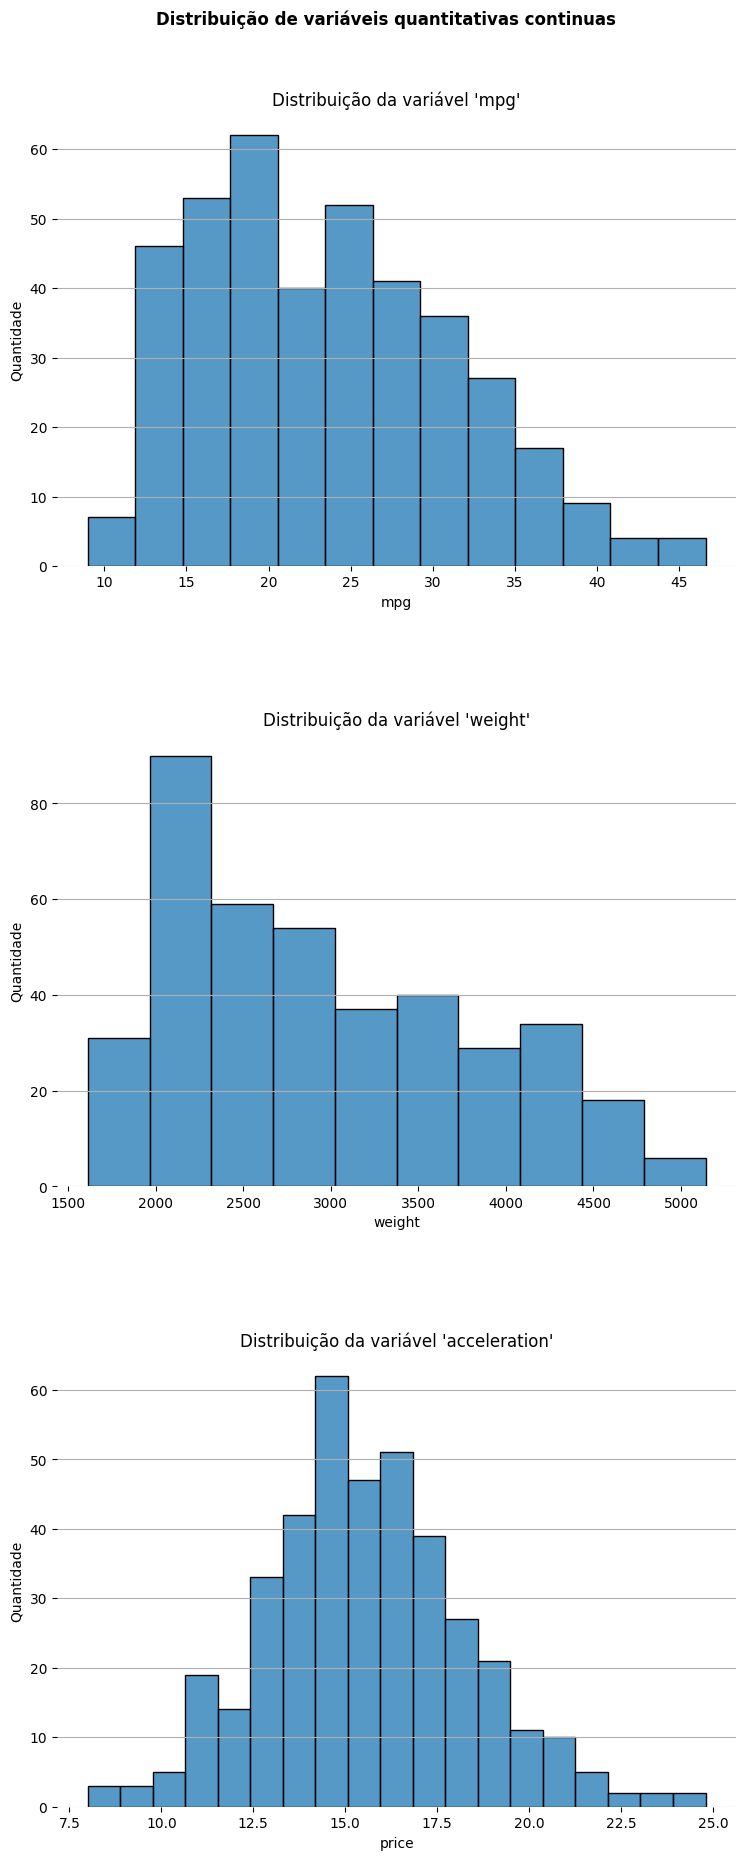

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(10,20))
plt.tight_layout(pad=10)
fig.suptitle('Distribuição de variáveis quantitativas continuas', fontweight='bold')

for i, variavel in enumerate(df_dict.query("subtipo == 'continua'").variavel.to_list()):
    ax = sns.histplot(
        data=df_copy,
        x=variavel,
        ax=axes.flatten()[i],
    )
    ax.set(frame_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel('price')
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

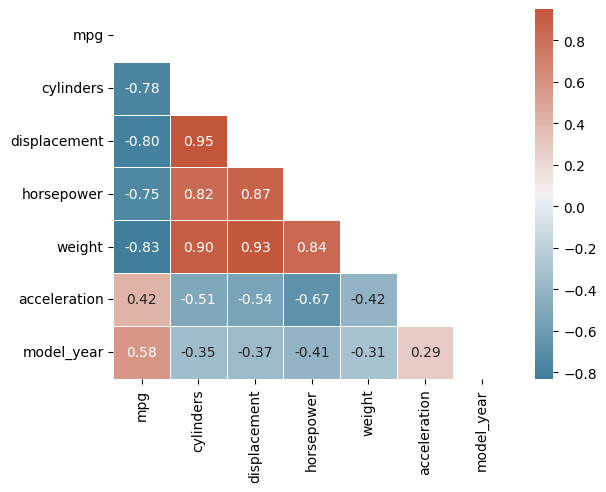

In [13]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,
            mask=mask,
            annot=True, 
            cmap=sns.diverging_palette(230, 20, as_cmap=True), 
            fmt=".2f", 
            linewidths=0.5)
plt.show()